# Random Forest

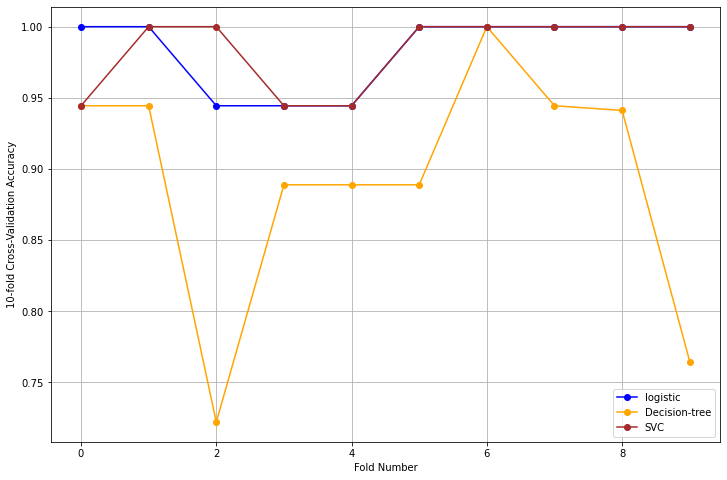

In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Chapter6/wine.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
wine = pd.read_csv(file_content_stream)

## Defining input and target 
X = wine.drop('Wine', axis = 1)
Y = wine['Wine']

## Standardizing input variables
scaler = MinMaxScaler(feature_range = (-1, 1))
X = scaler.fit_transform(X)

## Defining logistic model 
logit = LogisticRegression(max_iter = 5000, solver = 'lbfgs', multi_class = 'auto', random_state = 1000)
logit_scores = cross_val_score(logit, X, Y, cv = 10, n_jobs = -1)

## Defining decision tree model
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 1000)
tree_scores = cross_val_score(tree, X, Y, cv = 10, n_jobs = -1)

## Defining svc model
svc = SVC(kernel = 'rbf', gamma = 'scale', random_state = 1000)
svc_scores = cross_val_score(svc, X, Y, cv = 10, n_jobs = -1)

## Plotting cross-validation results
fig = plt.figure(figsize = (12, 8))
plt.plot(logit_scores, color = 'blue', marker = 'o')
plt.plot(tree_scores, color = 'orange', marker = 'o')
plt.plot(svc_scores, color = 'brown', marker = 'o')
plt.xlabel('Fold Number')
plt.ylabel('10-fold Cross-Validation Accuracy')
plt.legend(['logistic', 'Decision-tree', 'SVC'], loc = 'lower right')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot1.pdf')

In [2]:
## average cross-validation accuracy
logit_scores.mean()

0.9833333333333334

In [3]:
## average cross-validation accuracy
tree_scores.mean()

0.8928104575163399

In [4]:
## average cross-validation accuracy
svc_scores.mean()

0.9833333333333334

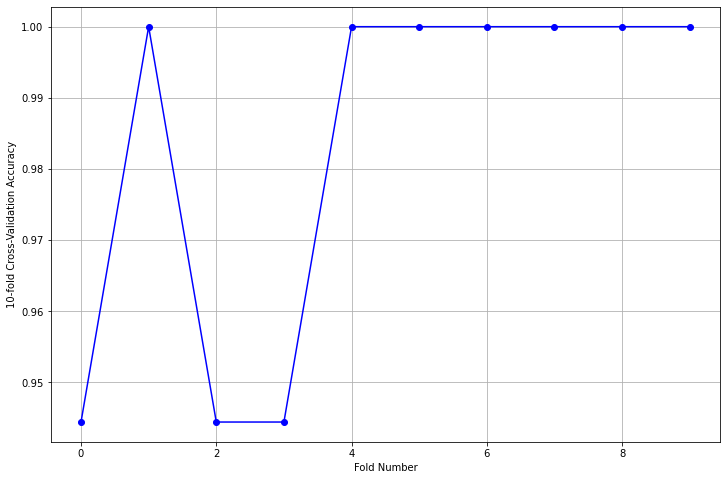

In [5]:
from sklearn.ensemble import RandomForestClassifier

## Defining random forest model
RF = RandomForestClassifier(n_estimators = 200, n_jobs = -1, criterion = 'entropy', random_state = 1000)
RF_scores = cross_val_score(RF, X, Y, cv = 10, n_jobs = -1)

## Plotting cross-validation results
fig = plt.figure(figsize = (12, 8))
plt.plot(RF_scores, color = 'blue', marker = 'o')
plt.xlabel('Fold Number')
plt.ylabel('10-fold Cross-Validation Accuracy')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot2.pdf')

In [6]:
## average cross-validation accuracy
RF_scores.mean()

0.9833333333333332

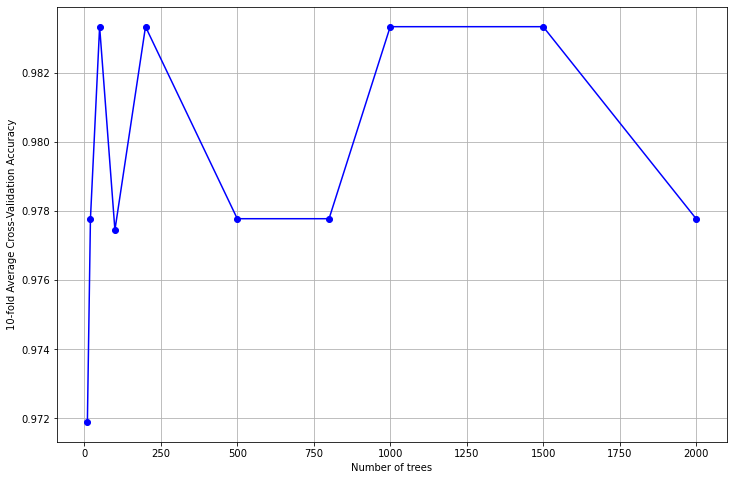

In [7]:
## Defining different number of to be considered trees
n_trees = [10, 20, 50, 100, 200, 500, 800, 1000, 1500, 2000]

results = []

for i in range(0, len(n_trees)):
    
    ## Defining random forest model
    RF = RandomForestClassifier(n_estimators = n_trees[i], n_jobs = -1, criterion = 'entropy', random_state = 1000)
    RF_scores = cross_val_score(RF, X, Y, cv = 10, n_jobs = -1)
    
    ## Appending average accuracy
    results.append(np.mean(RF_scores))

## Plotting cross-validation results
fig = plt.figure(figsize = (12, 8))
plt.plot(n_trees, results, color = 'blue', marker = 'o')
plt.xlabel('Number of trees')
plt.ylabel('10-fold Average Cross-Validation Accuracy')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot3.pdf')

# Feature Importance

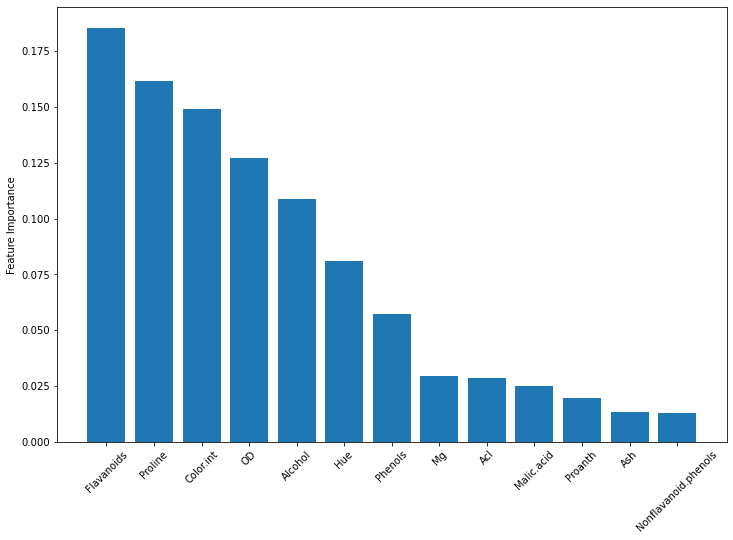

In [8]:
from sklearn.ensemble import RandomForestClassifier

## Fitting a 200-tree random forest model
RF = RandomForestClassifier(n_estimators = 200, n_jobs = -1, criterion = 'entropy', random_state = 100).fit(X, Y)

## Exctracting feature importance 
importances = RF.feature_importances_

## Extracting feature names 
feature_names = wine.drop('Wine', axis = 1).columns

## sorting the importances (from largest to smallest)
to_arrange = np.argsort(importances)[::-1]
importances = importances[to_arrange]
feature_names = feature_names[to_arrange]

## Visualizing the importances
fig = plt.figure(figsize = (12, 8))
plt.bar(feature_names, importances)
plt.xticks(rotation = 45)
plt.ylabel('Feature Importance')
plt.show()

# fig.savefig('chapter6_plot4.pdf')

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## Fitting a 200-tree random forest model
RF = RandomForestClassifier(n_estimators = 200, n_jobs = -1, criterion = 'entropy', random_state = 100).fit(X, Y)

## Selecting important features
sfm = SelectFromModel(estimator = RF, prefit = True, threshold = 0.02)
X_sfm = sfm.transform(X)
X_sfm.shape

(178, 10)

# AdaBoost (Exponential Loss)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


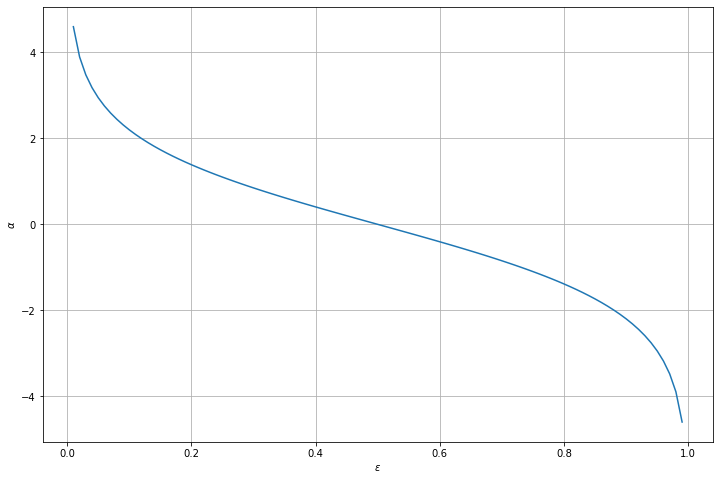

In [21]:
## Visualizing alpha as a function of epsilon
epsilon = np.linspace(0.01, 1, num = 100)
alpha = np.log((1 - epsilon) / epsilon)

fig = plt.figure(figsize = (12, 8))
plt.plot(epsilon, alpha)
plt.xlabel('$\epsilon$')
plt.ylabel(r'$\alpha$')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot5.pdf')

# AdaBoost SAMME Loss Function

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


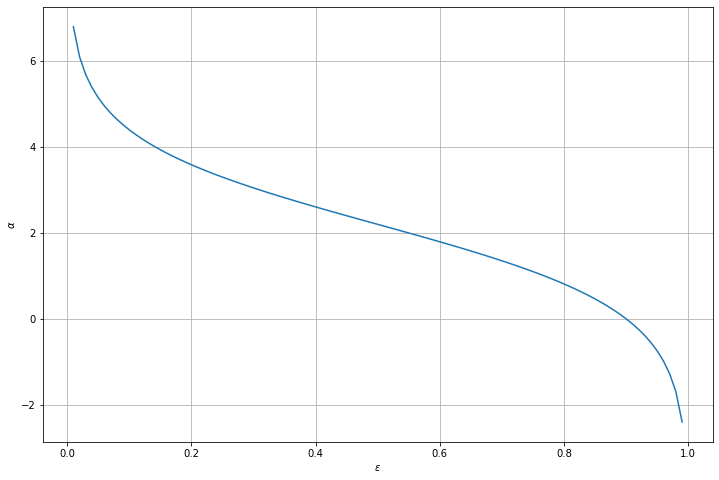

In [3]:
## Visualizing alpha as a function of epsilon
p = 10
epsilon = np.linspace(0.01, 1, num = 100)
alpha = np.log((1 - epsilon) * (p - 1) / epsilon)

fig = plt.figure(figsize = (12, 8))
plt.plot(epsilon, alpha)
plt.xlabel('$\epsilon$')
plt.ylabel(r'$\alpha$')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot6.pdf')

# AdaBoost (number of estimators cross-validation)

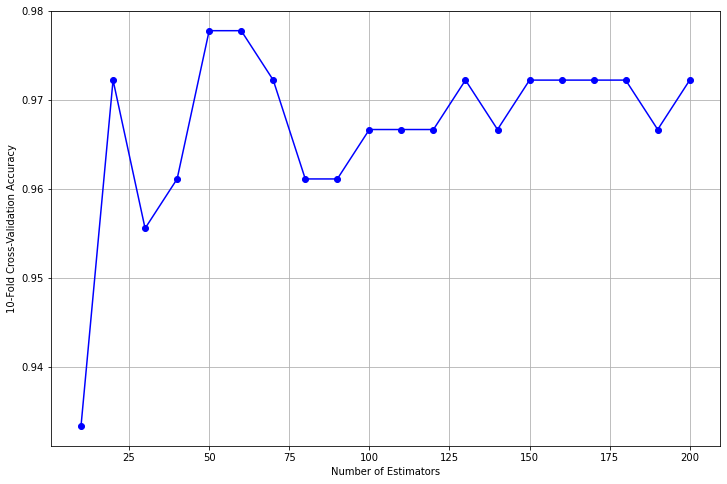

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

## Defining the list to store results
results = []

for i in range(10, 201, 10):
    
    ## Defining the AdaBoost model
    ada_md = AdaBoostClassifier(n_estimators = i, learning_rate = 0.8, random_state = 1032)
    
    ## Appending model results
    results.append(np.mean(cross_val_score(ada_md, X, Y, cv = 10, n_jobs = -1)))

## Visualizing results
numb_estimators = range(10, 201, 10)

fig = plt.figure(figsize = (12, 8))
plt.plot(numb_estimators, results, color = 'blue', marker = 'o')
plt.xlabel('Number of Estimators')
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot7.pdf')

# AdaBoost (learning rate cross-validation)

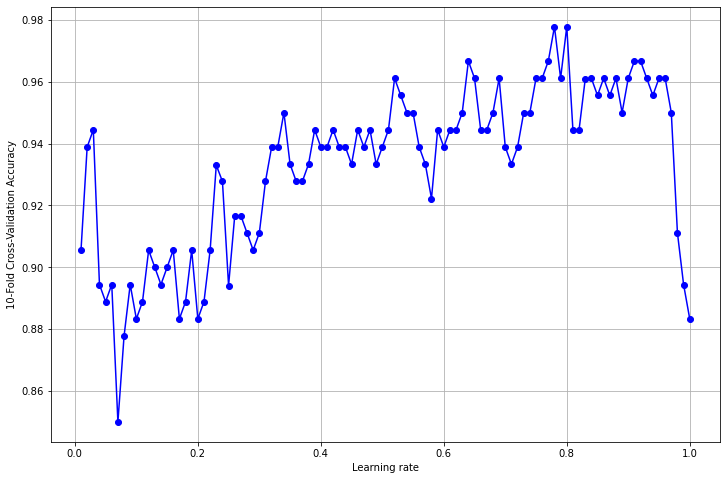

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

## Defining the list to store results
results = []

for i in np.linspace(0.01, 1, 100):
    
    ## Defining the AdaBoost model
    ada_md = AdaBoostClassifier(n_estimators = 50, learning_rate = i, random_state = 1032)
    
    ## Appending model results
    results.append(np.mean(cross_val_score(ada_md, X, Y, cv = 10, n_jobs = -1)))

## Visualizing results
learning_rates = np.linspace(0.01, 1, 100)

fig = plt.figure(figsize = (12, 8))
plt.plot(learning_rates, results, color = 'blue', marker = 'o')
plt.xlabel('Learning rate')
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot8.pdf')

# AdaBoost with SVM as Base Estimator

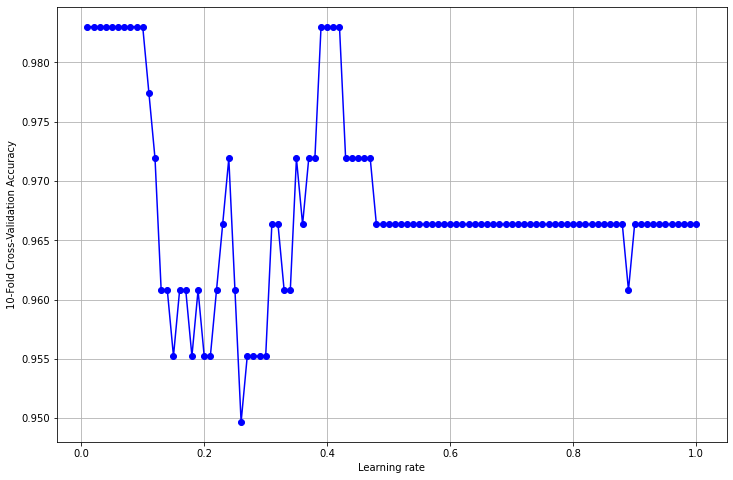

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

## Defining the list to store results
results = []

for i in np.linspace(0.01, 1, 100):
    
    ## Defining the base-estimator model
    svm_md = SVC(kernel = 'rbf', probability = True)
    
    ## Defining the AdaBoost model
    ada_md = AdaBoostClassifier(base_estimator = svm_md, n_estimators = 50, learning_rate = i, random_state = 1032)
    
    ## Appending model results
    results.append(np.mean(cross_val_score(ada_md, X, Y, cv = 10, n_jobs = -1)))

## Visualizing results
learning_rates = np.linspace(0.01, 1, 100)

fig = plt.figure(figsize = (12, 8))
plt.plot(learning_rates, results, color = 'blue', marker = 'o')
plt.xlabel('Learning rate')
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.grid()
plt.show()


# Gradient Tree Boosting

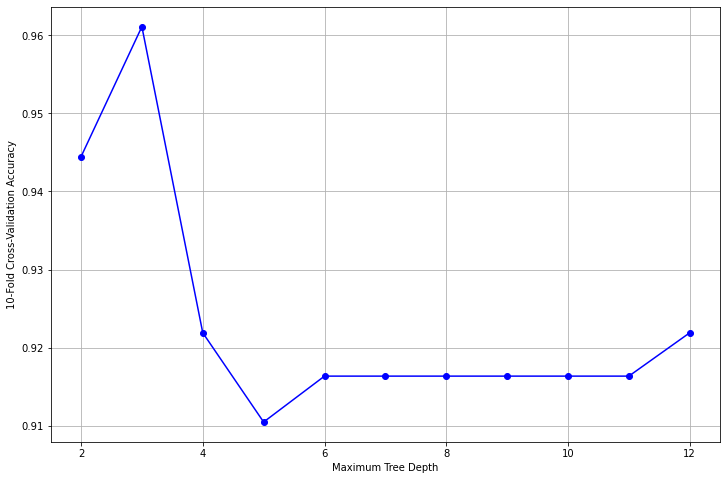

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

## Defining the list to store results
results = []

## Defining eta
eta = 0.8

for depth in range(2, 13):
    
    ## Defining the gradient tree boosting model
    gbm = GradientBoostingClassifier(n_estimators = 50, learning_rate = eta, max_depth = depth, random_state = 607)
    
    ## Appending model results
    results.append(np.mean(cross_val_score(gbm, X, Y, cv = 10, n_jobs = -1)))

## Visualizing results
tree_depths = range(2, 13)

fig = plt.figure(figsize = (12, 8))
plt.plot(tree_depths, results, color = 'blue', marker = 'o')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot9.pdf')

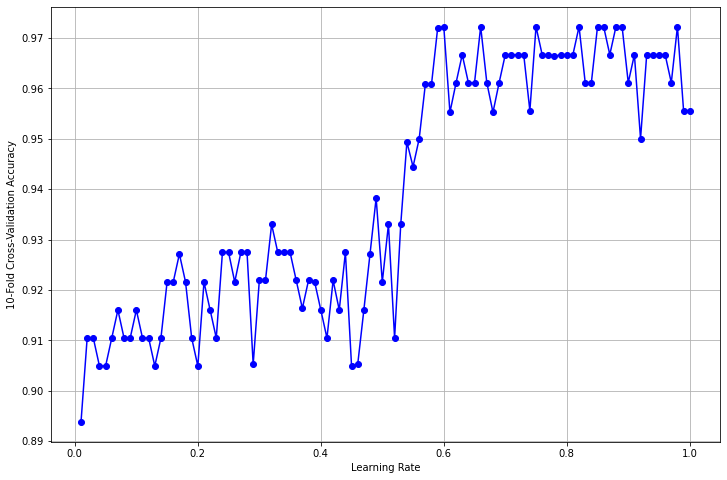

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

## Defining the list to store results
results = []

for eta in np.linspace(0.01, 1, 100):
    
    ## Defining the gradient tree boosting model
    gbm = GradientBoostingClassifier(n_estimators = 50, learning_rate = eta, max_depth = 3, random_state = 1022)
    
    ## Appending model results
    results.append(np.mean(cross_val_score(gbm, X, Y, cv = 10, n_jobs = -1)))

## Visualizing results
eta = np.linspace(0.01, 1, 100)

fig = plt.figure(figsize = (12, 8))
plt.plot(eta, results, color = 'blue', marker = 'o')
plt.xlabel('Learning Rate')
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot10.pdf')

# XGBoost

In [3]:
pip install xgboost

     |████████████████████████████████| 166.7 MB 31 kB/s s eta 0:00:01    |███████████████▋                | 81.6 MB 75.5 MB/s eta 0:00:02     |██████████████████████▏         | 115.3 MB 75.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

## Putting the right format (so we can apply XGBoost)
Y_xgb = Y - 1

## Splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_xgb, test_size = 0.2, random_state = 1107)

## Defining the train and test dataset as DMatrix
data_train = xgb.DMatrix(X_train, label = Y_train)
data_test = xgb.DMatrix(X_test, label = Y_test)

## Defining the hyper-parameters
params = {
    'max_depth': 3,
    'eta': 1.0,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': 3,
    'lambda': 1.0,
    'seed': 1124
}

## Defining the numbe of estimators
numb_rounds = 20

## Training the model
evals = [(data_test, 'test'), (data_train, 'train')]
model = xgb.train(params, data_train, numb_rounds, evals)

[0]	test-mlogloss:0.50573	train-mlogloss:0.27165
[1]	test-mlogloss:0.27580	train-mlogloss:0.10589
[2]	test-mlogloss:0.17552	train-mlogloss:0.05008
[3]	test-mlogloss:0.12534	train-mlogloss:0.02894
[4]	test-mlogloss:0.10165	train-mlogloss:0.01857
[5]	test-mlogloss:0.08151	train-mlogloss:0.01360
[6]	test-mlogloss:0.06850	train-mlogloss:0.01129
[7]	test-mlogloss:0.07110	train-mlogloss:0.01060
[8]	test-mlogloss:0.07111	train-mlogloss:0.01010
[9]	test-mlogloss:0.06906	train-mlogloss:0.00979
[10]	test-mlogloss:0.06858	train-mlogloss:0.00978
[11]	test-mlogloss:0.06835	train-mlogloss:0.00978
[12]	test-mlogloss:0.06824	train-mlogloss:0.00978
[13]	test-mlogloss:0.06819	train-mlogloss:0.00978
[14]	test-mlogloss:0.06816	train-mlogloss:0.00978
[15]	test-mlogloss:0.06815	train-mlogloss:0.00978
[16]	test-mlogloss:0.06814	train-mlogloss:0.00978
[17]	test-mlogloss:0.06814	train-mlogloss:0.00978
[18]	test-mlogloss:0.06814	train-mlogloss:0.00978
[19]	test-mlogloss:0.06813	train-mlogloss:0.00978


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Constructing confusion matrix to evaluate model performance
Y_pred = model.predict(data_test)
print(confusion_matrix(Y_test, np.argmax(Y_pred, axis = 1)))
print(accuracy_score(Y_test, np.argmax(Y_pred, axis = 1)))

[[11  0  0]
 [ 0 15  0]
 [ 0  0 10]]
1.0


# XGBoost (second approach)

In [56]:
xgb_clf = xgb.XGBClassifier(max_depth = 3, n_estimators = 20, learning_rate = 0.8, n_jobs = -1, use_label_encoder = False).fit(X_train, Y_train, eval_metric = 'mlogloss')
Y_pred = xgb_clf.predict_proba(X_test)
Y_pred

array([[9.8514605e-01, 7.9677515e-03, 6.8862811e-03],
       [1.0099989e-02, 1.7449735e-02, 9.7245026e-01],
       [3.0187028e-03, 9.9525660e-01, 1.7247298e-03],
       [1.7957147e-03, 7.3414333e-02, 9.2478997e-01],
       [2.0888302e-02, 9.7058052e-01, 8.5311839e-03],
       [9.9729651e-01, 1.3017410e-03, 1.4017528e-03],
       [8.2439266e-04, 9.9847466e-01, 7.0094230e-04],
       [3.4439647e-01, 6.2428582e-01, 3.1317696e-02],
       [1.0197435e-03, 9.9466467e-01, 4.3155588e-03],
       [9.8669785e-01, 6.4050341e-03, 6.8971282e-03],
       [5.3976130e-02, 3.8685754e-02, 9.0733814e-01],
       [4.8694673e-01, 3.4654152e-01, 1.6651179e-01],
       [2.6319702e-03, 5.8984403e-03, 9.9146956e-01],
       [8.2409679e-04, 9.9811637e-01, 1.0595917e-03],
       [7.6554692e-03, 9.9164844e-01, 6.9615018e-04],
       [9.9542022e-01, 3.1806543e-03, 1.3991155e-03],
       [1.4027335e-01, 5.5193889e-01, 3.0778772e-01],
       [2.8920360e-02, 9.5972019e-01, 1.1359447e-02],
       [6.8773393e-04, 9.986

In [57]:
print(confusion_matrix(Y_test, np.argmax(Y_pred, axis = 1)))

[[11  0  0]
 [ 1 14  0]
 [ 0  0 10]]


# XGBoost (tuning tree depth)

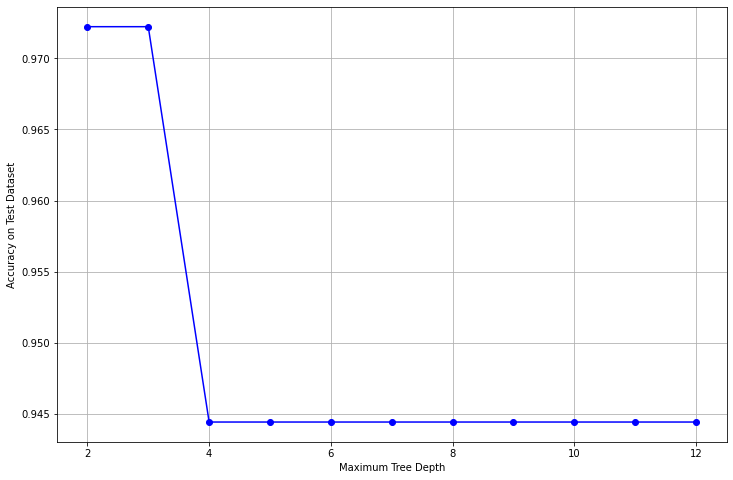

In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

## Defining the list to store results
results = []

for depth in range(2, 13):
    
    ## Defining the gradient tree boosting model
    xgb_md = xgb.XGBClassifier(max_depth = depth, n_estimators = 50, learning_rate = 0.8, n_jobs = -1, use_label_encoder = False).fit(X_train, Y_train, eval_metric = 'mlogloss')
    
    ## Predicting on test dataset
    y_pred = xgb_md.predict_proba(X_test)

    ## Appending model results
    results.append(accuracy_score(Y_test, np.argmax(y_pred, axis = 1)))

## Visualizing results
depth = range(2, 13)

fig = plt.figure(figsize = (12, 8))
plt.plot(depth, results, color = 'blue', marker = 'o')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy on Test Dataset')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot11.pdf')

# XGBoost (tuning learning rate)

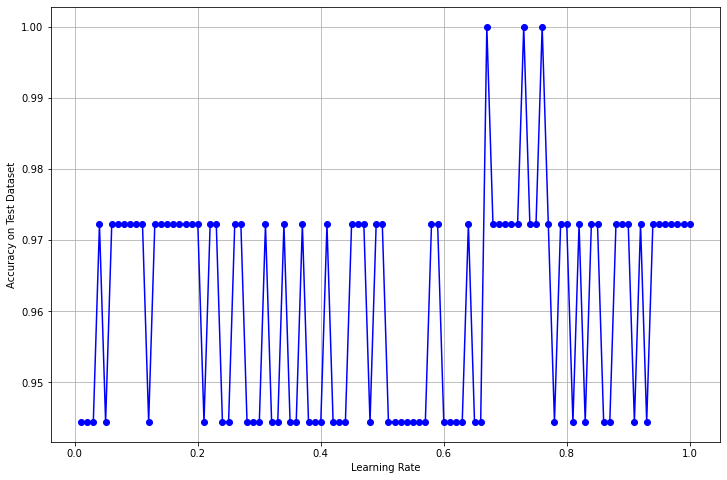

In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

## Defining the list to store results
results = []

for eta in np.linspace(0.01, 1, 100):
    
    ## Defining the gradient tree boosting model
    xgb_md = xgb.XGBClassifier(max_depth = 2, n_estimators = 50, learning_rate = eta, n_jobs = -1, use_label_encoder = False).fit(X_train, Y_train, eval_metric = 'mlogloss')
    
    ## Predicting on test dataset
    y_pred = xgb_md.predict_proba(X_test)

    ## Appending model results
    results.append(accuracy_score(Y_test, np.argmax(y_pred, axis = 1)))

## Visualizing results
eta = np.linspace(0.01, 1, 100)

fig = plt.figure(figsize = (12, 8))
plt.plot(eta, results, color = 'blue', marker = 'o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy on Test Dataset')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot12.pdf')

# XGBoost Feature Importance

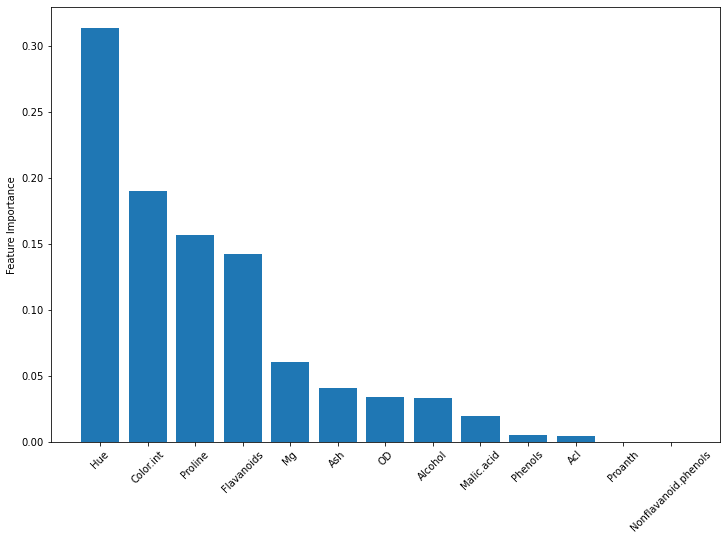

In [18]:
## Defining the gradient tree boosting model
xgb_md = xgb.XGBClassifier(max_depth = 2, n_estimators = 50, learning_rate = 0.67, n_jobs = -1, use_label_encoder = False).fit(X_train, Y_train, eval_metric = 'mlogloss')

## Exctracting feature importance 
importances = xgb_md.feature_importances_

## Extracting feature names 
feature_names = wine.drop('Wine', axis = 1).columns

## sorting the importances (from largest to smallest)
to_arrange = np.argsort(importances)[::-1]
importances = importances[to_arrange]
feature_names = feature_names[to_arrange]

## Visualizing the importances
fig = plt.figure(figsize = (12, 8))
plt.bar(feature_names, importances)
plt.xticks(rotation = 45)
plt.ylabel('Feature Importance')
plt.show()

# fig.savefig('chapter6_plot13.pdf')